In [1]:
import numpy as np #para processamento numérico em Python
import matplotlib.pyplot as plt #para os gráficos
import geopandas as gpd #para a leitura de shapefiles
import seaborn as sns #para fazer o mapa de kernel
from matplotlib.patches import Ellipse #para projetar a elipse 
import contextily
import pandas as pd

# pointpats --> análise espacial de pontos
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs
from pointpats.distance_statistics import G, F, K, Genv, Fenv, Kenv
from pointpats import PoissonPointProcess

# Municípios do Mato Grosso do Sul

In [2]:
ms = gpd.read_file('data/MS/ms.shp')

In [3]:
ms

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,140,5000203,ÁGUA CLARA,"POLYGON ((-53.09300 -20.21272, -53.08960 -20.2..."
1,141,5000252,ALCINÓPOLIS,"POLYGON ((-53.50659 -18.40831, -53.50794 -18.4..."
2,142,5000609,AMAMBAI,"POLYGON ((-54.92462 -22.92414, -54.92290 -22.9..."
3,143,5000708,ANASTÁCIO,"POLYGON ((-55.41798 -20.86286, -55.41794 -20.8..."
4,144,5000807,ANAURILÂNDIA,"POLYGON ((-52.73613 -21.85311, -52.70559 -21.8..."
...,...,...,...,...
73,213,5007950,TACURU,"POLYGON ((-55.20586 -23.40518, -55.20386 -23.4..."
74,214,5007976,TAQUARUSSU,"POLYGON ((-53.43801 -22.48280, -53.43799 -22.4..."
75,215,5008008,TERENOS,"POLYGON ((-54.76317 -20.47306, -54.76272 -20.4..."
76,216,5008305,TRÊS LAGOAS,"POLYGON ((-52.50132 -19.62639, -52.49514 -19.6..."


In [4]:
ms.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

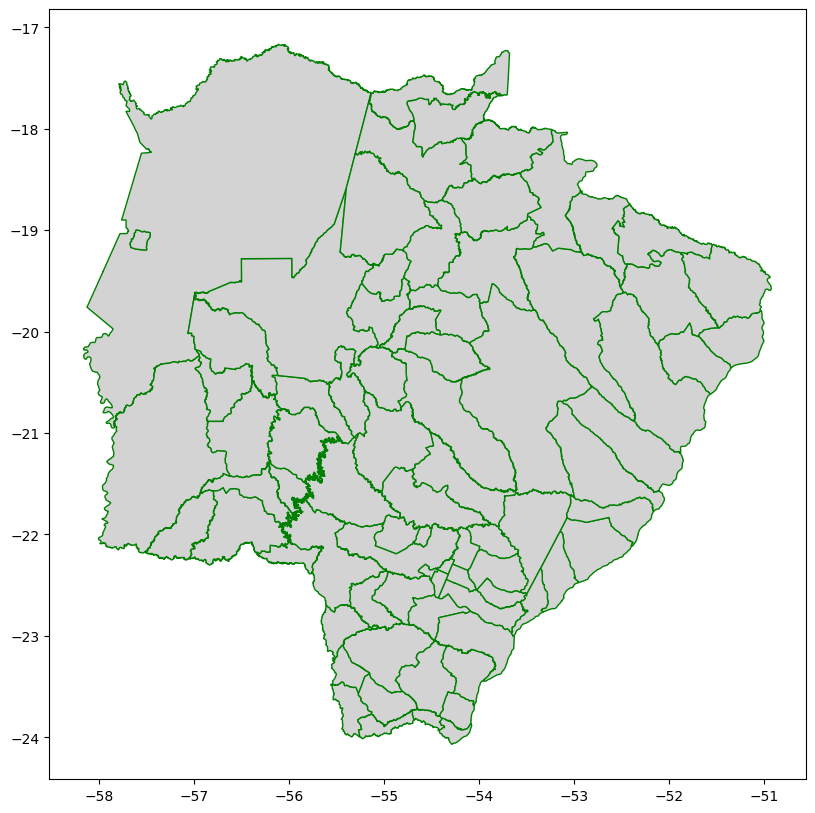

In [5]:
ms.plot(facecolor='lightgray', edgecolor='green',figsize=(15,10))
plt.show()

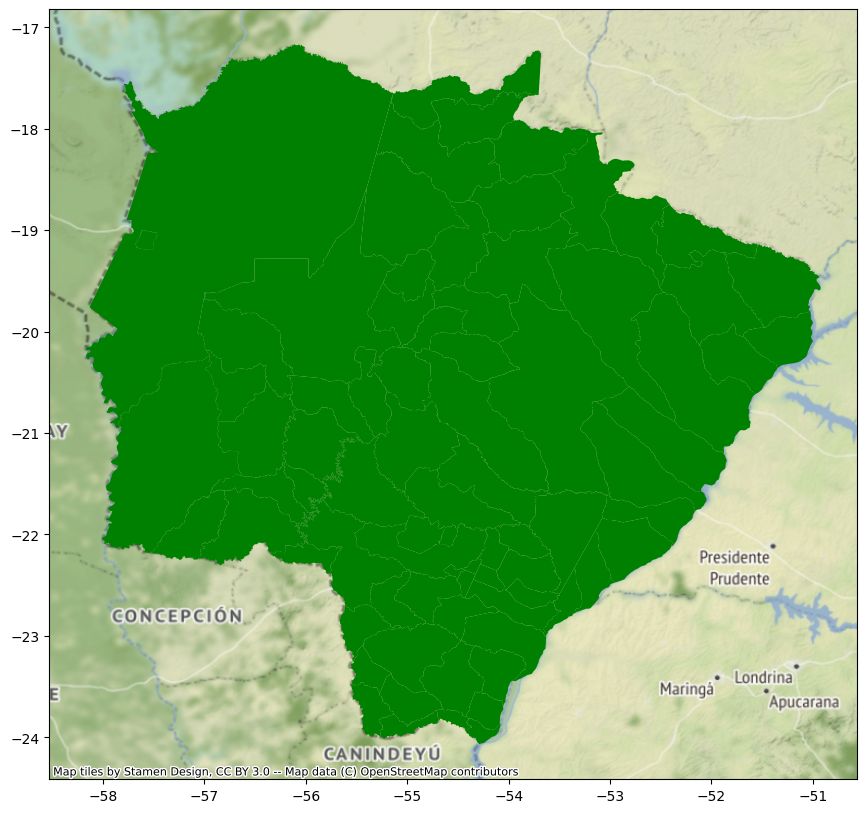

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
ms.plot(ax=ax, color="green")
contextily.add_basemap(ax=ax, crs="EPSG:4674")
plt.show()

In [7]:
def calcula_centroide(geometry):
  return geometry.centroid

In [8]:
ms["centroides"] = ms["geometry"].apply(lambda polygon: calcula_centroide(polygon))

In [9]:
ms.head()

,ID,CD_GEOCODM,NM_MUNICIP,geometry,centroides
0,140,5000203,ÁGUA CLARA,"POLYGON ((-53.09300 -20.21272, -53.08960 -20.2...",POINT (-52.99102 -19.78242)
1,141,5000252,ALCINÓPOLIS,"POLYGON ((-53.50659 -18.40831, -53.50794 -18.4...",POINT (-53.74925 -18.20917)
2,142,5000609,AMAMBAI,"POLYGON ((-54.92462 -22.92414, -54.92290 -22.9...",POINT (-54.96774 -23.15780)
3,143,5000708,ANASTÁCIO,"POLYGON ((-55.41798 -20.86286, -55.41794 -20.8...",POINT (-55.76127 -20.70705)
4,144,5000807,ANAURILÂNDIA,"POLYGON ((-52.73613 -21.85311, -52.70559 -21.8...",POINT (-52.80819 -22.11162)


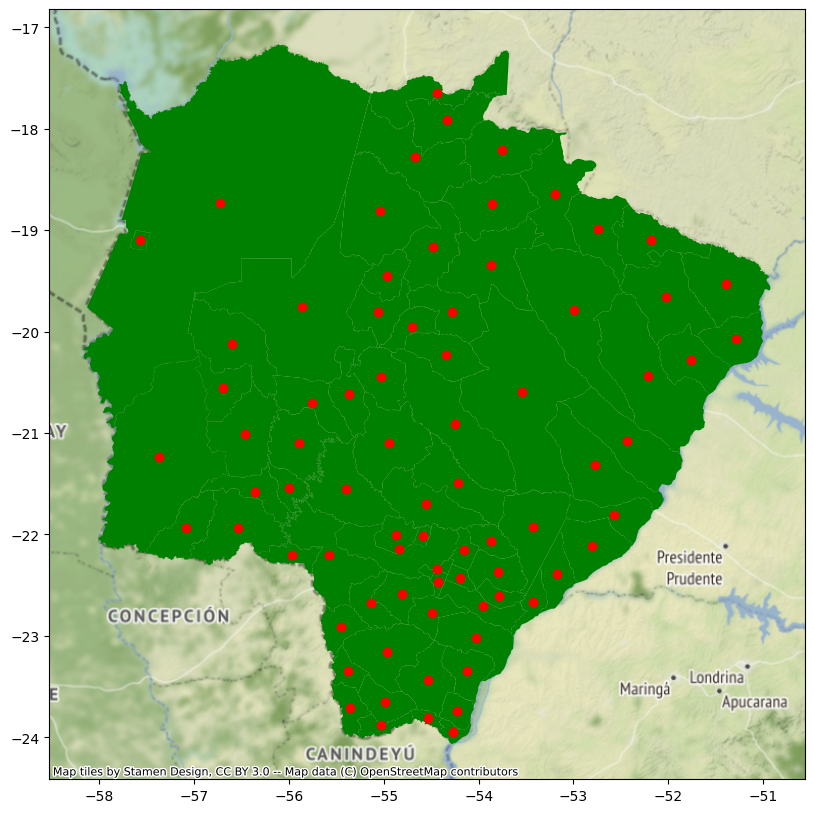

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ms.plot(ax=ax, color="green")
contextily.add_basemap(ax=ax, crs="EPSG:4674")
ms["centroides"].plot(ax=ax, color="red")
plt.show()

# Concatenando Tabelas

In [16]:
ls_df = [
pd.read_csv('data/ibge/Tabela616 - População economicamente ativa - MUNICIPIOS.csv', sep=',', skiprows=5),             # Done
pd.read_csv('data/ibge/Tabela1384 - Pessoas por classes de rendimento - MUNICIPIOS.csv', sep=',', skiprows=4),        # Done
pd.read_csv('data/ibge/Tabela1394 - Domicílios por condição de ocupação - MUNICIPIOS.csv', sep=',', skiprows=6),      # Done
pd.read_csv('data/ibge/Tabela1394 - Domicílios por número de banheiros - MUNICIPIOS.csv', sep=',', skiprows=5),     # Done
pd.read_csv('data/ibge/Tabela1552 - Residentes com 65 anos ou mais - MUNICIPIOS.csv', sep=';', skiprows=7),        # Unnamed columns
pd.read_csv('data/ibge/Tabela1552 - Residentes menores de 18 anos - MUNICIPIOS.csv', sep=';', skiprows=7),         # Unnamed columns
pd.read_csv('data/ibge/Tabela2009 - Domicílios por número de dormitórios - MUNICIPIOS.csv', sep=',', skiprows=4),     # Done
pd.read_csv('data/ibge/Tabela2031 - Pessoas por posição na ocupação e categoria do emprego no trabalho principal - MUNICIPIOS.csv', sep=',', skiprows=4), #Done
pd.read_csv('data/ibge/Tabela3219 - Domicílios por número de moradores - MUNICIPIOS.csv', sep=',', skiprows=5),       # Done
pd.read_csv('data/ibge/Tabela3219 - Domicílios por tipo - MUNICIPIOS.csv', sep=',', skiprows=6),                 # Done
pd.read_csv('data/ibge/Tabela3277 - Pessoas por classes de rendimentos - MUNICIPIOS CENTRO OESTE.csv', sep=',', skiprows=5), #Done
pd.read_csv('data/ibge/Tabela3573 - Pessoas desocupadas.csv', sep=',', skiprows=6),
pd.read_csv('data/ibge/Tabela3603 - Pessoas ocupadas por local do trabalho principal.csv', sep=',', skiprows=5),
 pd.read_csv('data/ibge/Tabela3604 - Pessoas ocupadas por tempo de deslocamento para trabalho.csv', sep=',', skiprows=5),
]

ls_names = ['arquivo_616',
'arquivo_1384',
'arquivo_1394',
'arquivo_1394_b',
'arquivo_1552_65',
'arquivo_1552_18',
'arquivo_2009',
'arquivo_2031',
'arquivo_3219',
'arquivo_3219_tipo',
'arquivo_3277',
'arquivo_3573',
'arquivo_3603',
'arquivo_3604']



## Tratamentos especiais:


In [ ]:
ls_df[3].drop(axis=0, index=0, inplace=True) 
ls_df[8].drop(axis=0, index=0, inplace=True) 

## Renomeando colunas

In [17]:
for i, df in enumerate(ls_df):
    df.name = ls_names[i]

In [18]:
def rename_columns(df):
    num_table = df.name.split('_')[1]
    columns = [f'[{num_table}]{col}' for col in df.columns[2:]]
    columns.insert(0, 'Municípios')
    columns.insert(0, 'Cod  Mun')
    df.columns = columns
    return df

In [19]:
for df in ls_df:
    df = rename_columns(df)


In [22]:
ls_df[0]

,Cod Mun,Municípios,[616]Situação do domicílio,[616]Grupo de idade,[616]Total
0,1100015,Alta Floresta D'Oeste (RO),Total,Total,10526.0
1,1100023,Ariquemes (RO),Total,Total,45162.0
2,1100031,Cabixi (RO),Total,Total,2867.0
3,1100049,Cacoal (RO),Total,Total,39977.0
4,1100056,Cerejeiras (RO),Total,Total,8670.0
...,...,...,...,...,...
5587,0,Zero resultante de um cálculo ou arredondament...,NaN,NaN,NaN
5588,X,Valor inibido para não identificar o informant...,NaN,NaN,NaN
5589,..,Valor não se aplica.\nEx: Não se pode obter o ...,NaN,NaN,NaN
5590,...,Valor não disponível.\nEx: A produção de feijã...,NaN,NaN,NaN


In [46]:
# arquivo_616 
# arquivo_1384         # Done
# arquivo_1394       # Done
# arquivo_1394_b 
# arquivo_1552_65 
# arquivo_1552_18 
# arquivo_2009 
# arquivo_2031 
# arquivo_3219 
# arquivo_3219_tipo 
# arquivo_3277
# arquivo_3573 
# arquivo_3603
# arquivo_3604 

## Renomeando colunas: